In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from src.h_statistic.h_statistic import calculate_h_stat_i_versus, calculate_h_stat
import pandas as pd
from src.domain.domain import ONE_VS_ONE, ONE_VS_ALL

In [3]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
model = LinearRegression().fit(X, y)

In [ ]:
h_stat_bedrooms_rooms = calculate_h_stat_i_versus(model, X.sample(100), "AveBedrms", ["AveRooms"])
h_stat_bedrooms_rooms

In [ ]:
h_stat_lat_vs_rooms = calculate_h_stat_i_versus(model, X.sample(100), "Longitude", ["AveRooms"])
h_stat_lat_vs_rooms

In [ ]:
h_stat_bedrooms_vs_all = calculate_h_stat_i_versus(model, X.sample(100), X.columns[2],
                                                   list(X.columns[:2]) + list(X.columns[3:]))
h_stat_bedrooms_vs_all

In [ ]:
h_stat_long_vs_all = calculate_h_stat_i_versus(model, X.sample(100), X.columns[-1], X.columns[:-1])
h_stat_long_vs_all

In [7]:
h_stat_long_vs_all = calculate_h_stat_i_versus(model, X.sample(100), X.columns[-1], X.columns[:-1])
h_stat_long_vs_all

100it [00:00, 173.72it/s]


0.8395872067380853

In [4]:
ovo = calculate_h_stat(model, X, 500, ONE_VS_ONE)
ovo

500it [00:01, 291.27it/s]
500it [00:01, 314.12it/s]
500it [00:01, 332.86it/s]
500it [00:01, 328.56it/s]
500it [00:01, 321.73it/s]
500it [00:01, 331.44it/s]
500it [00:01, 341.60it/s]
500it [00:01, 332.06it/s]
500it [00:01, 333.61it/s]
500it [00:01, 338.12it/s]
500it [00:01, 336.21it/s]
500it [00:01, 335.31it/s]
500it [00:01, 336.39it/s]
500it [00:01, 336.37it/s]
500it [00:01, 336.10it/s]
500it [00:01, 336.78it/s]
500it [00:01, 322.84it/s]
500it [00:01, 342.06it/s]
500it [00:01, 334.66it/s]
500it [00:01, 340.39it/s]
500it [00:01, 324.70it/s]
500it [00:01, 337.11it/s]
500it [00:01, 333.33it/s]
500it [00:01, 337.08it/s]
500it [00:01, 331.22it/s]
500it [00:01, 321.78it/s]
500it [00:01, 310.84it/s]
500it [00:01, 269.83it/s]


,Feature 1,Feature 2,H-statistic
0,Population,AveOccup,0.999994
1,HouseAge,AveOccup,0.996871
2,HouseAge,Population,0.996795
3,AveRooms,AveBedrms,0.992478
4,AveRooms,Population,0.981705
5,AveRooms,AveOccup,0.981653
6,HouseAge,AveRooms,0.975884
7,AveBedrms,AveOccup,0.974258
8,AveBedrms,Population,0.974241
9,Latitude,Longitude,0.973952


<AxesSubplot: xlabel='Pair of features'>

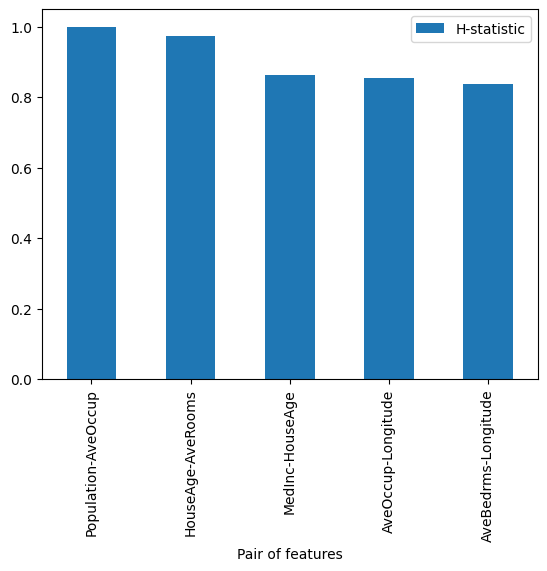

In [8]:
ovo['Pair of features'] = ovo.apply(lambda row: row['Feature 1'] + '-' + row['Feature 2'], axis=1)

ovo.iloc[::6, :].plot.bar(x='Pair of features', y="H-statistic")

In [10]:
ova = calculate_h_stat(model, X, 500, ONE_VS_ALL)
ova

500it [00:02, 237.06it/s]
500it [00:02, 241.84it/s]
500it [00:02, 229.53it/s]
500it [00:02, 233.34it/s]
500it [00:02, 249.05it/s]
500it [00:02, 248.60it/s]
500it [00:02, 248.12it/s]
500it [00:02, 248.60it/s]


,Feature,H-statistic
0,Latitude,0.826091
1,MedInc,0.826091
2,HouseAge,0.826091
3,AveRooms,0.826091
4,AveBedrms,0.826091
5,Population,0.826091
6,AveOccup,0.826091
7,Longitude,0.826091


<AxesSubplot: xlabel='Feature'>

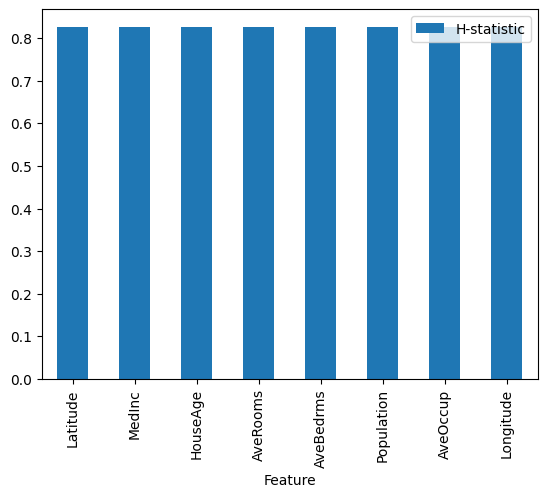

In [12]:
ova.plot.bar(x='Feature', y="H-statistic")